Using matplotlib backend: module://matplotlib_inline.backend_inline


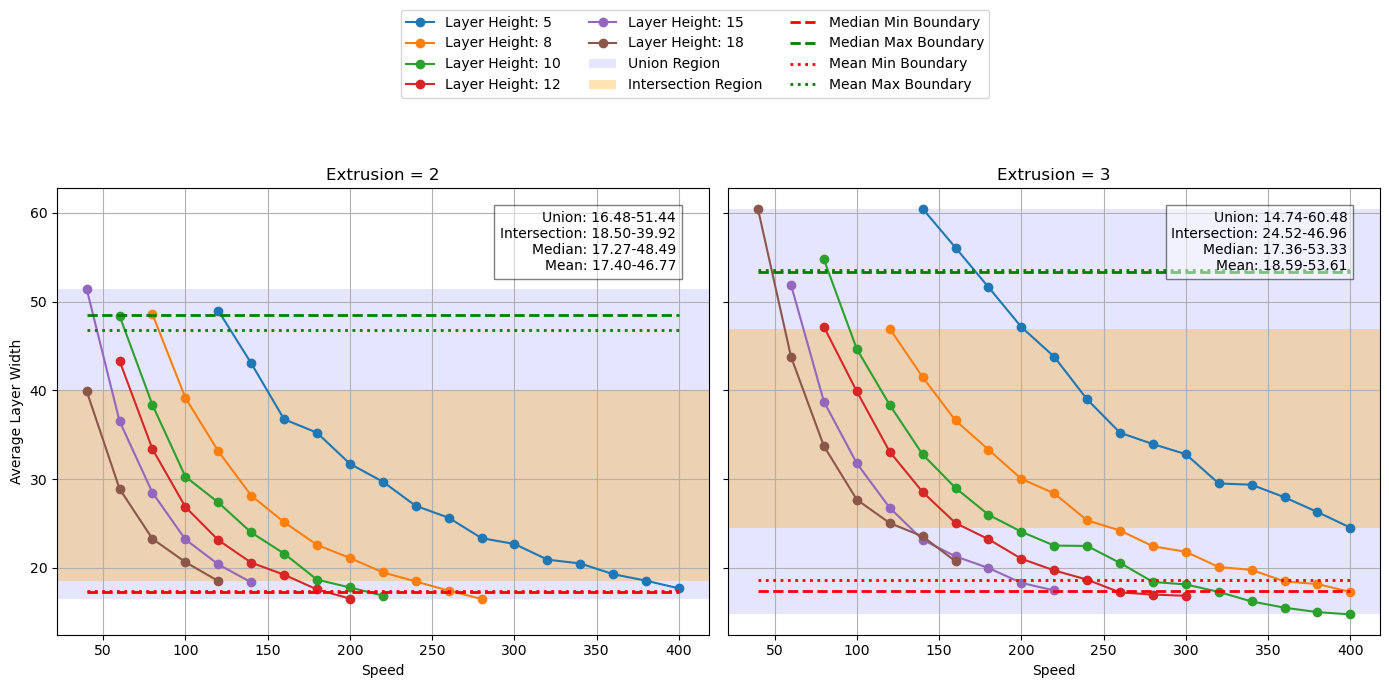

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib

# Read data from CSV file
df = pd.read_csv('data/data_3dcp_wClean.csv')

# Drop rows where layer_width == -1
df = df[df['layer_width'] != -1]

# # Filter based on over-under flag
# df = df[df['over-under'] == 0]

# Group by layer_height, extrusion, and speed to compute average layer_width
grouped = df.groupby(['layer_height', 'extrusion', 'speed'], as_index=False)['layer_width'].mean()

# Set up subplots for extrusion = 2 (left) and extrusion = 3 (right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Process each extrusion value
for i, extr in enumerate([2, 3]):
    ax = axes[i]
    sub_data = grouped[grouped['extrusion'] == extr]
    
    if sub_data.empty:
        ax.text(0.5, 0.5, f"No data for extrusion {extr}",
                horizontalalignment='center', verticalalignment='center')
    else:
        boundary_list = []
        
        # Plot the average layer_width vs. speed for each layer_height and record boundaries
        for layer_height, group in sub_data.groupby('layer_height'):
            ax.plot(group['speed'], group['layer_width'], marker='o',
                    label=f"Layer Height: {layer_height}")
            min_val = group['layer_width'].min()
            max_val = group['layer_width'].max()
            boundary_list.append((min_val, max_val))
        
        # Calculate union boundaries (the envelope across all layer_heights)
        union_min = min(b[0] for b in boundary_list)
        union_max = max(b[1] for b in boundary_list)
        
        # Calculate intersection boundaries (the overlap common to all layer_heights)
        intersect_min = max(b[0] for b in boundary_list)
        intersect_max = min(b[1] for b in boundary_list)
        
        # Determine the overall speed range for this extrusion group
        speed_min = sub_data['speed'].min()
        speed_max = sub_data['speed'].max()
        
        # Highlight the union region (light blue) and intersection region (light orange)
        ax.axhspan(union_min, union_max, facecolor='blue', alpha=0.1, label='Union Region')
        if intersect_min < intersect_max:
            ax.axhspan(intersect_min, intersect_max, facecolor='orange', alpha=0.3, label='Intersection Region')
        else:
            ax.text(0.5, 0.5, "No intersection region", transform=ax.transAxes, ha='center')
        
        # Compute medial (median) boundaries across layer heights
        med_min = np.median([b[0] for b in boundary_list])
        med_max = np.median([b[1] for b in boundary_list])
        # Draw the median boundaries as dashed lines
        ax.hlines(med_min, speed_min, speed_max, colors='red', linestyles='dashed',
                  linewidth=2, label='Median Min Boundary')
        ax.hlines(med_max, speed_min, speed_max, colors='green', linestyles='dashed',
                  linewidth=2, label='Median Max Boundary')
        
        # Compute mean boundaries across layer heights
        mean_min = np.mean([b[0] for b in boundary_list])
        mean_max = np.mean([b[1] for b in boundary_list])
        # Draw the mean boundaries as dotted lines
        ax.hlines(mean_min, speed_min, speed_max, colors='red', linestyles='dotted',
                  linewidth=2, label='Mean Min Boundary')
        ax.hlines(mean_max, speed_min, speed_max, colors='green', linestyles='dotted',
                  linewidth=2, label='Mean Max Boundary')
        
        # Annotate the boundaries in the top right of the subplot
        annotation_text = (f"Union: {union_min:.2f}-{union_max:.2f}\n"
                           f"Intersection: {intersect_min:.2f}-{intersect_max:.2f}\n"
                           f"Median: {med_min:.2f}-{med_max:.2f}\n"
                           f"Mean: {mean_min:.2f}-{mean_max:.2f}")
        ax.text(0.95, 0.95, annotation_text, transform=ax.transAxes,
                ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
    
    ax.set_title(f"Extrusion = {extr}")
    ax.set_xlabel("Speed")
    if i == 0:
        ax.set_ylabel("Average Layer Width")
    ax.grid(True)

# Create a single common legend from both subplots.
handles, labels = [], []
for ax in axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)

# Position the legend higher up (using bbox_to_anchor)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, frameon=True)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

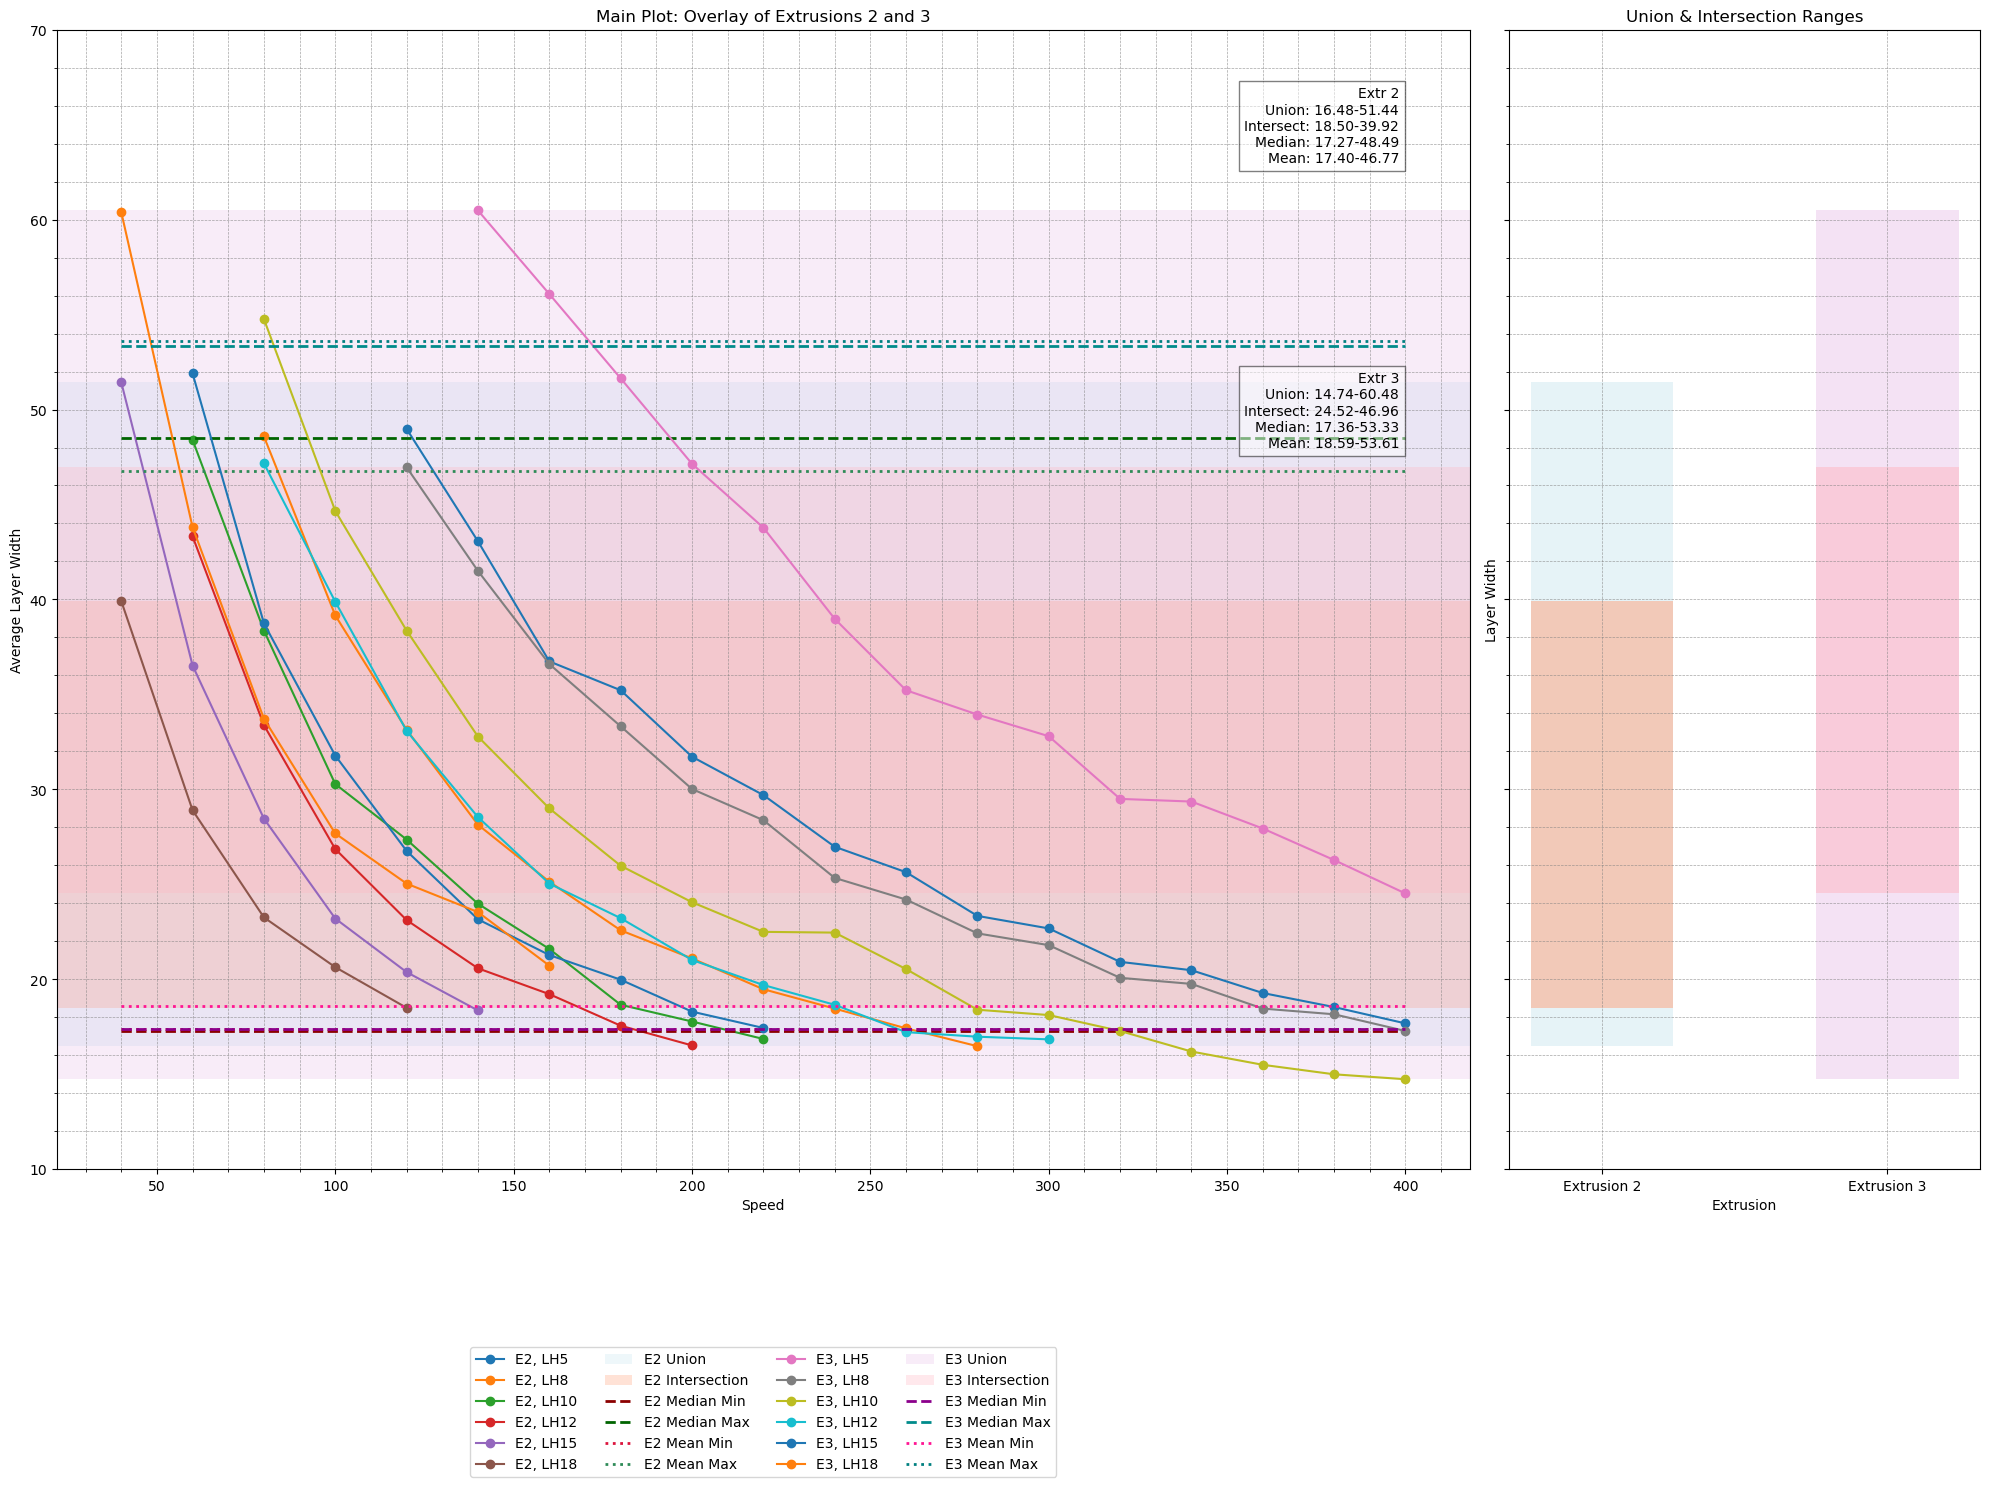

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # -----------------------------
# # 1. Read and Prepare the Data
# # -----------------------------
# df = pd.read_csv('data/data_3dcp_wClean.csv')
# df = df[df['layer_width'] != -1]  # Drop rows with invalid layer_width
# grouped = df.groupby(['layer_height', 'extrusion', 'speed'], as_index=False)['layer_width'].mean()

# # -----------------------------------------------------
# # 2. Set Up Two Subplots with Different Widths
# # -----------------------------------------------------
# # Left: Main plot (overlay of lines and shaded regions)
# # Right: Bar chart for union & intersection ranges (one column per extrusion)
# fig, (ax_main, ax_bar) = plt.subplots(
#     1, 2, figsize=(20, 15),
#     gridspec_kw={'width_ratios': [3, 1]},
#     sharey=True
# )

# # -----------------------------------------------------
# # 3. Define Colors for Each Extrusion
# # -----------------------------------------------------
# colors = {
#     2: {
#         'union':        'lightblue',
#         'intersection': 'lightsalmon',
#         'median_min':   'darkred',
#         'median_max':   'darkgreen',
#         'mean_min':     'crimson',
#         'mean_max':     'seagreen'
#     },
#     3: {
#         'union':        'plum',
#         'intersection': 'lightpink',
#         'median_min':   'darkmagenta',
#         'median_max':   'darkcyan',
#         'mean_min':     'deeppink',
#         'mean_max':     'teal'
#     }
# }

# # Dictionary to store union/intersection boundaries for each extrusion
# results = {}

# # -----------------------------------------------------
# # 4. Main Plot: Overlay Lines, Shaded Regions, Boundaries
# # -----------------------------------------------------
# for extr in [2, 3]:
#     sub_data = grouped[grouped['extrusion'] == extr]
#     if sub_data.empty:
#         continue

#     boundary_list = []
    
#     # Plot each layer_height's curve
#     for layer_height, group in sub_data.groupby('layer_height'):
#         ax_main.plot(group['speed'], group['layer_width'], marker='o',
#                      label=f"E{extr}, LH{layer_height}")
#         min_val = group['layer_width'].min()
#         max_val = group['layer_width'].max()
#         boundary_list.append((min_val, max_val))
    
#     # Compute union boundaries (from smallest min to largest max)
#     union_min = min(b[0] for b in boundary_list)
#     union_max = max(b[1] for b in boundary_list)
#     # Compute intersection boundaries (from largest min to smallest max)
#     intersect_min = max(b[0] for b in boundary_list)
#     intersect_max = min(b[1] for b in boundary_list)
    
#     speed_min = sub_data['speed'].min()
#     speed_max = sub_data['speed'].max()
    
#     # Draw union region first...
#     ax_main.axhspan(union_min, union_max, facecolor=colors[extr]['union'], alpha=0.2,
#                     label=f"E{extr} Union")
#     # ... then draw the intersection region on top (if valid)
#     if intersect_min < intersect_max:
#         ax_main.axhspan(intersect_min, intersect_max, facecolor=colors[extr]['intersection'], alpha=0.3,
#                         label=f"E{extr} Intersection")
#     else:
#         ax_main.text(0.5, 0.5, f"E{extr}: No intersection", transform=ax_main.transAxes, ha='center')
    
#     # Draw median boundaries (dashed)
#     med_min = np.median([b[0] for b in boundary_list])
#     med_max = np.median([b[1] for b in boundary_list])
#     ax_main.hlines(med_min, speed_min, speed_max, colors=colors[extr]['median_min'], linestyles='dashed',
#                    linewidth=2, label=f"E{extr} Median Min")
#     ax_main.hlines(med_max, speed_min, speed_max, colors=colors[extr]['median_max'], linestyles='dashed',
#                    linewidth=2, label=f"E{extr} Median Max")
    
#     # Draw mean boundaries (dotted)
#     mean_min = np.mean([b[0] for b in boundary_list])
#     mean_max = np.mean([b[1] for b in boundary_list])
#     ax_main.hlines(mean_min, speed_min, speed_max, colors=colors[extr]['mean_min'], linestyles='dotted',
#                    linewidth=2, label=f"E{extr} Mean Min")
#     ax_main.hlines(mean_max, speed_min, speed_max, colors=colors[extr]['mean_max'], linestyles='dotted',
#                    linewidth=2, label=f"E{extr} Mean Max")
    
#     # Store boundaries for the bar chart
#     results[extr] = {
#         'union_min': union_min,
#         'union_max': union_max,
#         'intersection_min': intersect_min,
#         'intersection_max': intersect_max
#     }
    
#     # Annotate main plot (offset to avoid overlap)
#     y_annot = 0.95 if extr == 2 else 0.70
#     annotation_text = (f"Extr {extr}\n"
#                        f"Union: {union_min:.2f}-{union_max:.2f}\n"
#                        f"Intersect: {intersect_min:.2f}-{intersect_max:.2f}\n"
#                        f"Median: {med_min:.2f}-{med_max:.2f}\n"
#                        f"Mean: {mean_min:.2f}-{mean_max:.2f}")
#     ax_main.text(0.95, y_annot, annotation_text, transform=ax_main.transAxes,
#                  ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

# ax_main.set_title("Main Plot: Overlay of Extrusions 2 and 3")
# ax_main.set_xlabel("Speed")
# ax_main.set_ylabel("Average Layer Width")
# ax_main.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# ax_main.minorticks_on()

# # -----------------------------------------------------
# # 5. Bar Chart: Overlayed Boxes (One Column per Extrusion)
# # -----------------------------------------------------
# # We use one x-position per extrusion.
# x_positions = [0, 1]
# for x, extr in zip(x_positions, [2, 3]):
#     union_min = results[extr]['union_min']
#     union_max = results[extr]['union_max']
#     intersect_min = results[extr]['intersection_min']
#     intersect_max = results[extr]['intersection_max']
#     union_height = union_max - union_min
#     intersection_height = intersect_max - intersect_min
    
#     # Draw the union bar first
#     ax_bar.bar(x, union_height, bottom=union_min, width=0.5,
#                color=colors[extr]['union'], alpha=0.3, label=f"E{extr} Union")
#     # Draw the intersection bar on top
#     ax_bar.bar(x, intersection_height, bottom=intersect_min, width=0.5,
#                color=colors[extr]['intersection'], alpha=0.5, label=f"E{extr} Intersection")

# ax_bar.set_xticks(x_positions)
# ax_bar.set_xticklabels([f"Extrusion {extr}" for extr in [2, 3]])
# ax_bar.set_title("Union & Intersection Ranges")
# ax_bar.set_xlabel("Extrusion")
# ax_bar.set_ylabel("Layer Width")
# ax_bar.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# ax_bar.set_ylim([10,70])

# # -----------------------------------------------------
# # 6. Create a Combined Legend for the Main Plot (Optional)
# # -----------------------------------------------------
# handles, labels = ax_main.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax_main.legend(by_label.values(), by_label.keys(), loc='upper center',
#                bbox_to_anchor=(0.5, -0.15), ncol=4)

# plt.tight_layout()
# plt.show()